In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers,datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
(X_train,Y_train),(X_test,Y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
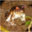

In [6]:
X_train[0]

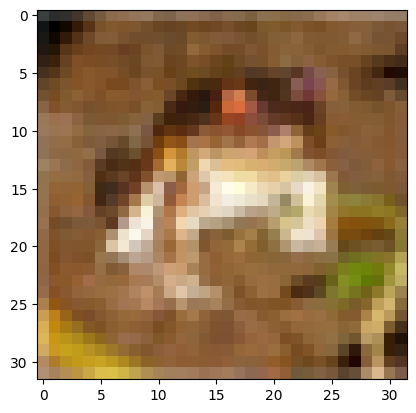

In [8]:
plt.imshow(X_train[0])

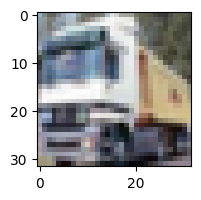

In [9]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[1])

In [25]:

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [37]:
Y_train = Y_train.reshape(-1,)
Y_test = Y_test.reshape(-1,)

In [38]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [39]:
X_train_sampled = X_train/255
X_test_sampled = X_test/255

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [34]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, Y_train, epochs=5,batch_size = 10)

Epoch 1/5
5000/5000 [==============================] - 341s 68ms/step - loss: nan - accuracy: 0.0999
Epoch 2/5
5000/5000 [==============================] - 335s 67ms/step - loss: nan - accuracy: 0.1000
Epoch 3/5
5000/5000 [==============================] - 332s 66ms/step - loss: nan - accuracy: 0.1000
Epoch 4/5
5000/5000 [==============================] - 333s 67ms/step - loss: nan - accuracy: 0.1000
Epoch 5/5
5000/5000 [==============================] - 332s 66ms/step - loss: nan - accuracy: 0.1000


In [41]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("classification_report\n" ,classification_report(Y_test,y_pred_classes))

313/313 [==============================] - 9s 28ms/step
classification_report
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
Cnn = models.Sequential([
        Conv2D(filters = 32,kernel_size = (3,3),activation = "relu",input_shape = (32,32,3)),
        MaxPooling2D((2,2)),
        Conv2D(filters = 64,kernel_size =  (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

In [53]:
Cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [56]:

Cnn.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 58s 37ms/step - loss: 2.3032 - accuracy: 0.0992
Epoch 2/5
1563/1563 [==============================] - 57s 36ms/step - loss: 2.3028 - accuracy: 0.0980
Epoch 3/5
1563/1563 [==============================] - 55s 35ms/step - loss: 2.3027 - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 56s 36ms/step - loss: 2.3028 - accuracy: 0.0998
Epoch 5/5
1563/1563 [==============================] - 54s 35ms/step - loss: 2.3028 - accuracy: 0.0985


In [57]:
Cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 7s 20ms/step - loss: 2.3027 - accuracy: 0.1000


[2.3026599884033203, 0.10000000149011612]

In [59]:
y_pred =  Cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[0.10232927, 0.09941261, 0.10077682, 0.0990939 , 0.09903101,
        0.10083836, 0.10140165, 0.09969416, 0.09937641, 0.09804587],
       [0.10232927, 0.09941261, 0.10077682, 0.0990939 , 0.09903101,
        0.10083836, 0.10140165, 0.09969416, 0.09937641, 0.09804587],
       [0.10232927, 0.09941261, 0.10077682, 0.0990939 , 0.09903101,
        0.10083836, 0.10140165, 0.09969416, 0.09937641, 0.09804587],
       [0.10232927, 0.09941261, 0.10077682, 0.0990939 , 0.09903101,
        0.10083836, 0.10140165, 0.09969416, 0.09937641, 0.09804587],
       [0.10232927, 0.09941261, 0.10077682, 0.0990939 , 0.09903101,
        0.10083836, 0.10140165, 0.09969416, 0.09937641, 0.09804587]],
      dtype=float32)

In [60]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 0, 0, 0, 0]